# Biogeographical module powered by jupyter 


### This is part of MetaPlastHunter package written by Michal Karlicki 









In [9]:
"Loading libriaries and helper functions"

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd


def tara_oceans_lon_lat(df):
    
    " returns long and lat for tara_data"
    
    tara_lat = df['Latitude [degrees North]'].tolist()
    tara_lat = map(lambda x: x.replace(",","."), tara_lat)
    tara_lon = df['Longitude [degrees East]']
    tara_lon = map(lambda x: x.replace(",","."), tara_lon)
    return tara_lon, tara_lat


def merge(tara_df, new_df):
    merged_left = pd.merge(left=tara_df,right=new_df, how='left', left_on='Station identifier [TARA_station#]', right_on='Station identifier [TARA_station#]')
    return merged_left


## Import and preparation TARA oceans metadata

In [7]:
#loading geographical data from 'tara_website'

# tara.csv - loaded file 

tara_df = pd.DataFrame.from_csv('../../tara.csv', header=0,sep=",", index_col=0)

#Keep only info about sampling site biogeographical  position 

tara_df = tara_df.drop_duplicates(subset='Station identifier [TARA_station#]', keep='first')


## Loading MetaPlastHunter results and combining with TARA oceans metadata

### For now some dummy table for X species

TODO:

* Wybieranie gatunku z wielogatunkowej tabeli


In [4]:
#loading results for one species
results_df = pd.DataFrame.from_csv("Single_Taxa_case.csv", header=0,sep=",", index_col=0)



#Merging dataframes 

merged = merge(tara_df,results_df)
filtered_merged = merged[merged['Taxon '].notnull()]

#longitude and latitude 

longitude, latitude = tara_oceans_lon_lat(filtered_merged)

#Extracting reads number
reads = filtered_merged['Reads number'].values
reads = np.log10(reads)

                              

## Drawing map with mpl_toolkits.basemap

Find out more at https://matplotlib.org/basemap/

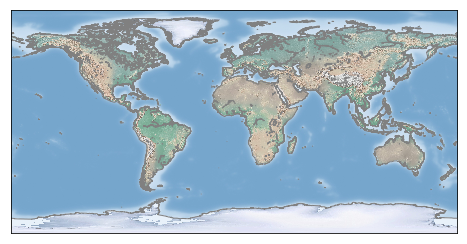

In [10]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='i',
llcrnrlat=-90, urcrnrlat=90,
llcrnrlon=-180, urcrnrlon=180,)
m.shadedrelief()
m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
#My points -> modifible
m.scatter(longitude, latitude, c=reads,cmap='Reds', alpha=0.5)
plt.show()